# Monte Carlo Methods and Financial Applications Final Project

### Unnikrishnan Sivakumaran Nair,  Gelareh Dejdar & Yuning Li

## 1. Problem Overview

In order to show the effectiveness of the Multilevel Monte Carlo Technique, we use the Option pricing application. We consider the European call option having the following parameters

In [1]:
#Option parameters
spot = 100
strike = 110
risk_free = 0.05
expiry = 1
vol = 0.2

### 2. Black - Scholes Price

We start with getting the actual price of the option by using the standard Black Scholes formula.

In [2]:
from analytic import black_scholes

In [3]:
black_scholes(100,110,0.05,0.2,1,'call')

6.040088129724249

It can be noticed that the Black-Scholes price of the option is 6.040088

### 3. Simulation using Standard MC

In [4]:
import itertools
import math
from mlmc.option import (EuropeanStockOption,
                         NaiveMCOptionSolver,
                         HeuristicLayeredMCOptionSolver)
from mlmc.stock import ConstantVolatilityStock

In [5]:
stock = ConstantVolatilityStock(spot, vol) #Simulates the path based on the spot price and volatility
constvol_option = EuropeanStockOption([stock], risk_free, expiry, True, strike)

In [5]:
interval = 0.1        
solver = NaiveMCOptionSolver(interval)

print(solver.solve_option_price(constvol_option,return_stats = True))

(5.996592316809182, 11.6834942581952, 52438, 10)


It can be seen that the estimated value of the option is 5.961442 and the std.deviation is 11.668904

In [117]:
from time import time
t1 = time()
solver.solve_option_price(constvol_option,return_stats = True)
t2 = time()

print(f"The time elapsed is {t2-t1}")

The time elapsed is 7.042620420455933


### 4. Simulation using the MLMC method

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
interval = 0.1       
solver = HeuristicLayeredMCOptionSolver(interval) #since alpha, beta and gamma are not passed it will be inferred by OLS

price, means,variances,counts = solver.solve_option_price(constvol_option,return_stats = True)

In [58]:
print(f"The Option Price is {price}")

The Option Price is 6.034641342395522


In [59]:
print(f"The optimal number of levels is {len(variances)}")

The optimal number of levels is 3


In [60]:
print(f"The variances are {variances}")

The variances are [96.2263772736067, 3.97565520274053, 0.8402908151193543]


In [62]:
from time import time
t1 = time()
solver.solve_option_price(constvol_option,return_stats = True)
t2 = time()

print(f"The time elapsed is {t2-t1}")

The time elapsed is 2.90402889251709


### 5. Evaluation

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from plot_results import *

In [12]:
interval = 0.1
expected = 6.04008812972
        
mlmc_solver = HeuristicLayeredMCOptionSolver(interval)

In [13]:
epsilon_list = [0.2,0.17,0.15,0.13,0.1]

...start pricing option using mlmc...


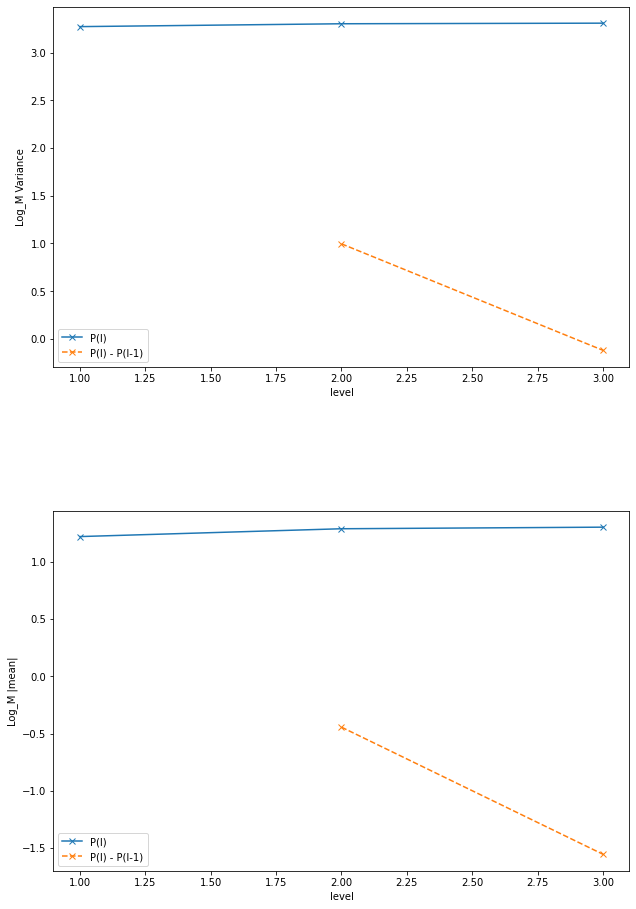

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
# plt.figure(figsize=(200,100)) 
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)
plot_log_var_mean(constvol_option,mlmc_solver,ax1,ax2)

NEW TRIAL
NEW TRIAL
NEW TRIAL
NEW TRIAL
NEW TRIAL


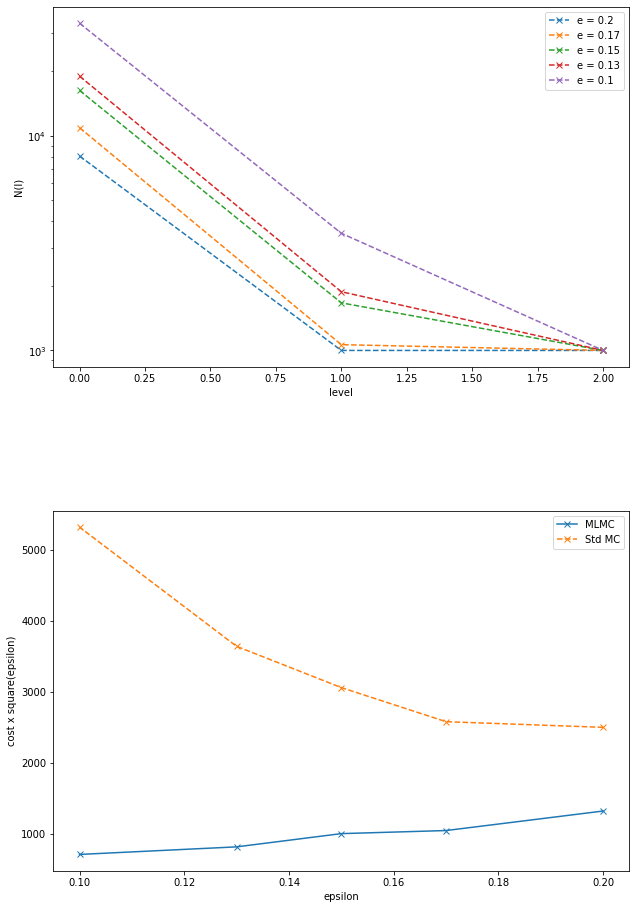

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
# plt.figure(figsize=(200,100)) 
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)
plot_numpaths(constvol_option, ax1, ax2,epsilon_list, 'simple')

It can be noticed that 
* The option price is much closer to the actual price calculated using the Black Scholes Technique than standard MC
* The variance gets reduced as the level progresses. The variance at level 3 is much lesser than the standard MC
* The time for computation has been greatly reduced. This is due to the predictor corrector strategy employed by MLMC

In this notebook, we have provided an overview of the methods and the techniques used. The full code implementation is available in github.
https://github.com/unnikrishnansivakumar/Monte-Carlo-for-Option-Pricing